<a href="https://colab.research.google.com/github/neSTORY/Deeplearning_Zero_to_All/blob/master/RNN_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic RNN

### code

In [ ]:
# import
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# One hot encoding for each char in "hello"
h = [1,0,0,0]
e = [0,1,0,0]
l = [0,0,1,0]
o = [0,0,0,1]

# One cell RNN input_dim (4) -> output_dim (2)
x_data = np.array([[h]], dtype=np.float32)

hidden_size = 2

cell = layers.SimpleRNNCell(units=hidden_size)
rnn = layers.RNN(cell, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)

# 같은 방식
# rnn = layers.SimpleRNN(units=hidden_size, return_state=True, return_sequences=True)
# outputs, states = rnn(x_data)

In [ ]:
print("x_data : {}, shape : {}".format(x_data, x_data.shape))
print("outputs : {}, shape : {}".format(outputs, outputs.shape))
print("states : {}, shape : {}".format(states, states.shape))

x_data : [[[1. 0. 0. 0.]]], shape : (1, 1, 4)
outputs : [[[-0.39635623 -0.0444679 ]]], shape : (1, 1, 2)
states : [[-0.39635623 -0.0444679 ]], shape : (1, 2)


- outputs : 전체 sequence에 해당하는 결과값을 가짐
- states : sequence의 마지막 hidden states의 값을 갖고 있음

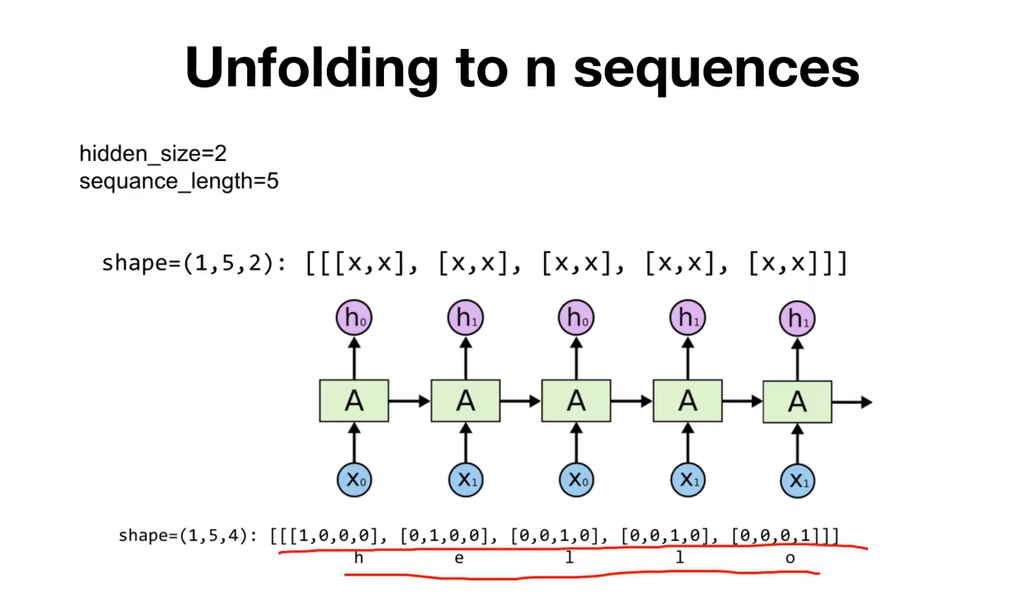

위 그림과 같이 sequence가 1이 아닌 (여기선 길이가 5) 데이터의 처리를 code로 구현하겠음

In [ ]:
x_data = np.array([[h,e,l,l,o]], dtype=np.float32)

hidden_size=2
rnn = layers.SimpleRNN(units=2, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)

print("x_data : {}, shape : {}".format(x_data, x_data.shape))
print("outputs : {}, shape : {}".format(outputs, outputs.shape))
print("states : {}, shape : {}".format(states, states.shape))

x_data : [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]], shape : (1, 5, 4)
outputs : [[[ 0.7436464   0.7352119 ]
  [-0.95641077  0.2007415 ]
  [-0.67177147 -0.9590415 ]
  [ 0.21670589 -0.8708637 ]
  [ 0.3685791   0.56972283]]], shape : (1, 5, 2)
states : [[0.3685791  0.56972283]], shape : (1, 2)


outputs에는 전체 hidden_states의 출력값들을 갖고 있고 states에는 마지막 hidden_states의 출력값을 갖고 있다.

그래서 states의 출력값은 outputs의 마지막 값과 일치함을 확인할 수 있다.

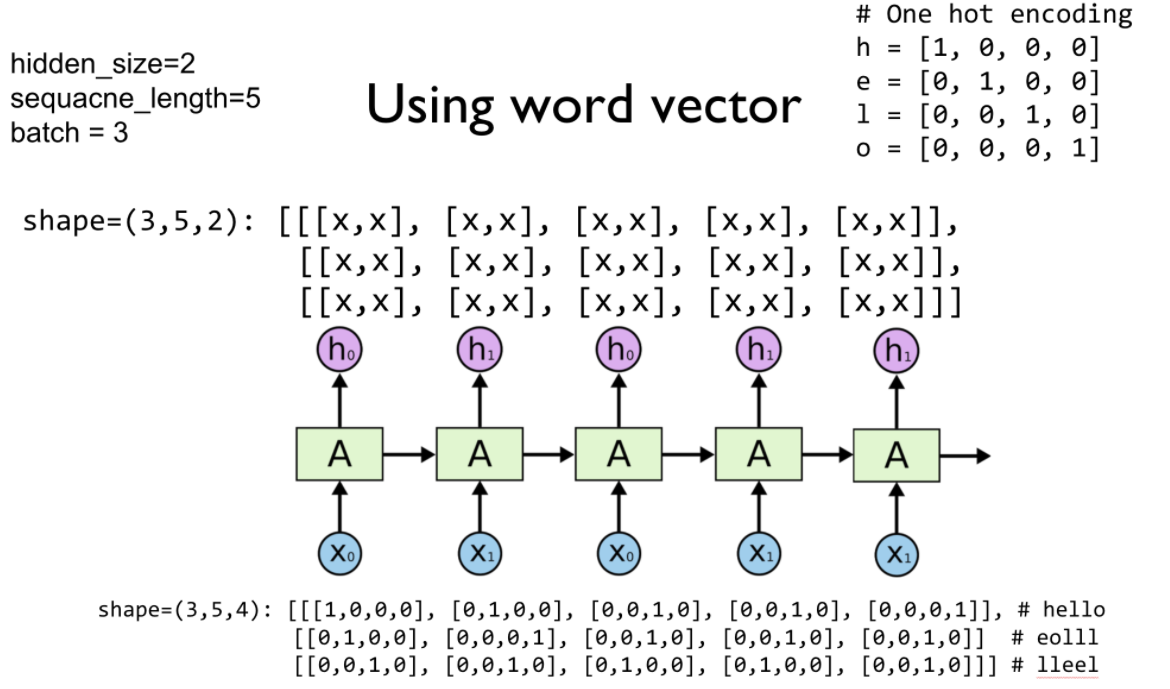

이번에는 batch가 3이고 sequence가 5인 데이터들을 처리해보겠음

In [ ]:
# One cell RNN input_dim (4) -> output_dim (2). sequence: 5, batch 3
# 3 batches 'hello', 'eolll', 'lleel'
x_data = np.array([[h, e, l, l, o],
                   [e, o, l, l, l],
                   [l, l, e, e, l]], dtype=np.float32)

hidden_size=2
rnn = layers.SimpleRNN(units=2, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)

print("x_data : {}, shape : {}\n".format(x_data, x_data.shape))
print("outputs : {}, shape : {}\n".format(outputs, outputs.shape))
print("states : {}, shape : {}".format(states, states.shape))

x_data : [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape : (3, 5, 4)

outputs : [[[-0.47085565  0.23293453]
  [-0.89744574 -0.776813  ]
  [-0.4218849  -0.36777103]
  [-0.30883253  0.22380485]
  [-0.75611615  0.622602  ]]

 [[-0.7366786  -0.7340723 ]
  [-0.63363904 -0.2840783 ]
  [-0.4918114   0.16451377]
  [-0.60261714  0.54334605]
  [-0.76775664  0.68752897]]

 [[-0.20337111  0.65029573]
  [-0.64219314  0.8243176 ]
  [-0.9605844  -0.5852657 ]
  [-0.8747964  -0.9629496 ]
  [-0.30881652 -0.4778929 ]]], shape : (3, 5, 2)

states : [[-0.75611615  0.622602  ]
 [-0.76775664  0.68752897]
 [-0.30881652 -0.4778929 ]], shape : (3, 2)


## Many to One

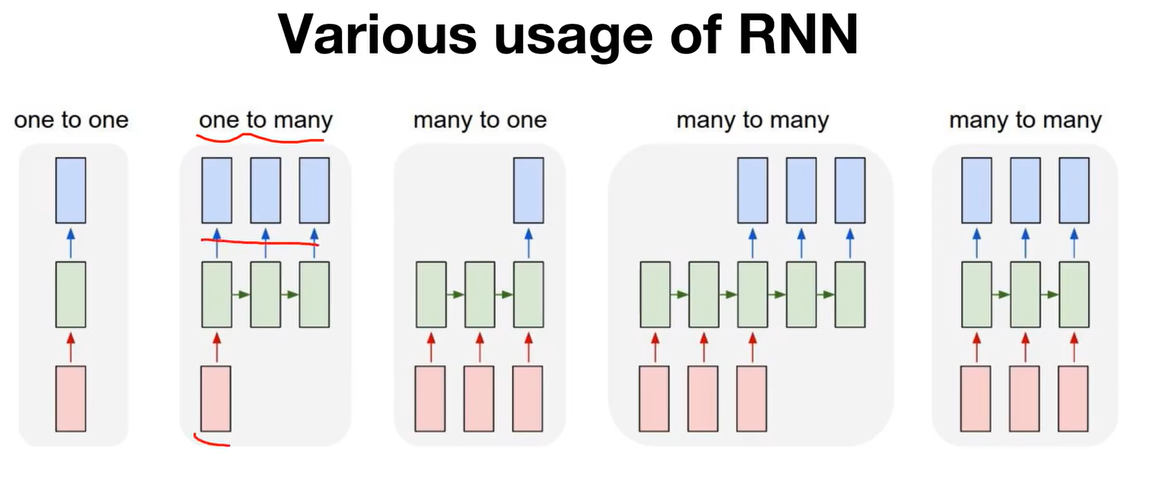

RNN은 위 그림같이 다양한 종류로 사용될 수 있음

- ex) many to many : 문장을 문장으로 / 문장을 입력받아 형태소를 출력
- many to one : 문장을 입력받아 긍정문/부정문인지 출력

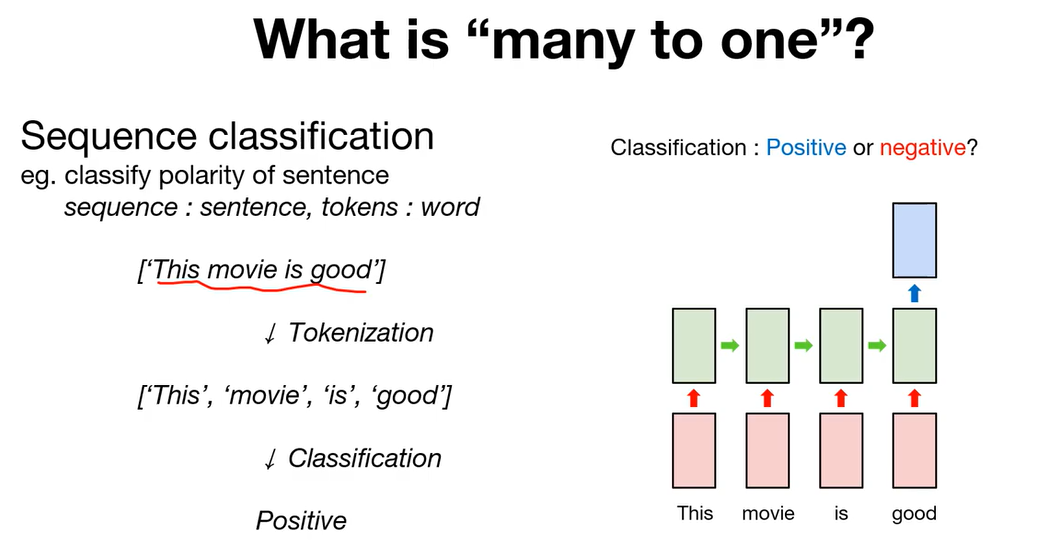

### many to one 예시
자연어 처리에서 RNN의 many to one을 통해 활용하는 예시를 살펴보자

문장을 워드의 sequence 라고 생각하면 문장을 단어 단위로 분리할 수 있다. 이렇게 분리하는 과정을 토큰화라고 하는데 "this movie is good" 이라는 문장을 단어 단위로 토큰화하여 문장의 긍정/부정을 구분할 수 있다.


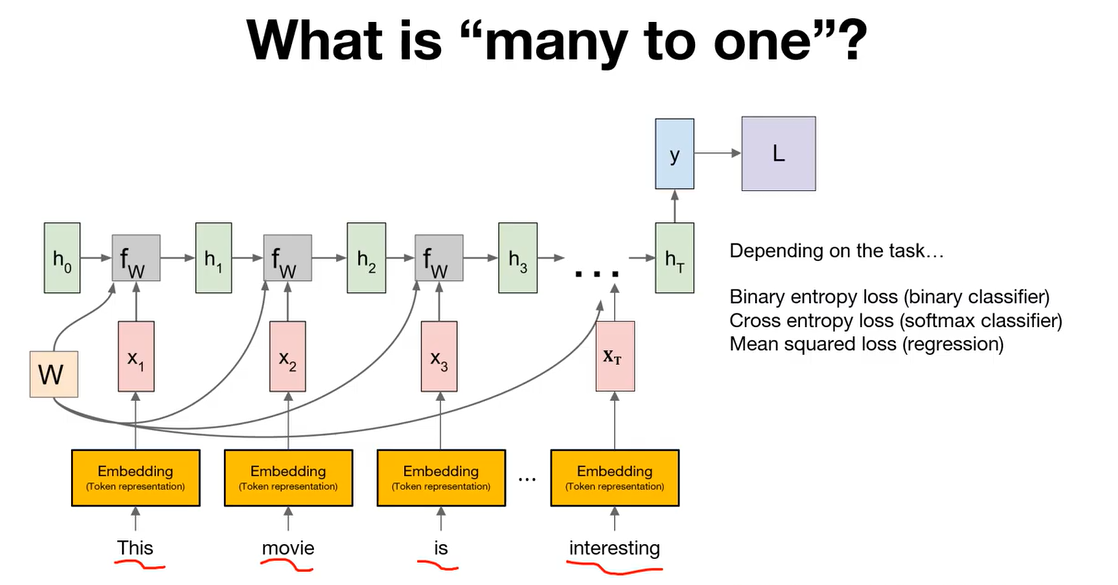

토큰화된 단어들은 숫자가 아니기 때문에 RNN으로 처리할 수가 없다. 그래서 자연어처리에서 RNN을 활용할 때 토큰화된것을 numeric(숫자)형태로 바꿔준다.

### code

In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model
from tensorflow.keras.preprocessing.sequence import pad_sequences

단어들의 알파벳을 모두 숫자화 시키고 숫자와 알파벳을 매치시키는 딕셔너리를 만들어보자

In [36]:
# example data
words = ["good", "bad", "worse", "so good"]
y_data = [1,0,0,1]

# creating a token dictionary
char_set = ["<pad>"] + sorted(list(set("".join(words))))
idx2char = {idx : char for idx, char in enumerate(char_set)}
char2idx = {char : idx for idx, char in enumerate(char_set)}

print(char_set)
print(idx2char)
print(char2idx)

['<pad>', ' ', 'a', 'b', 'd', 'e', 'g', 'o', 'r', 's', 'w']
{0: '<pad>', 1: ' ', 2: 'a', 3: 'b', 4: 'd', 5: 'e', 6: 'g', 7: 'o', 8: 'r', 9: 's', 10: 'w'}
{'<pad>': 0, ' ': 1, 'a': 2, 'b': 3, 'd': 4, 'e': 5, 'g': 6, 'o': 7, 'r': 8, 's': 9, 'w': 10}


In [37]:
# converting sequence of tokens to sequence of indices
x_data = list(map(lambda word : [char2idx.get(char) for char in word], words))
x_data_len = list(map(lambda word : len(word), x_data))

print(x_data)
print(x_data_len)

[[6, 7, 7, 4], [3, 2, 4], [10, 7, 8, 9, 5], [9, 7, 1, 6, 7, 7, 4]]
[4, 3, 5, 7]


In [33]:
# 위 코드 해석
# lambda word : word라는 lambda 함수
# [char2idx.get(char) for char in word] : word 내 문자 하나마다 숫자로 변경
# , words 리스트에 적용

각 단어들의 길이가 다르기 때문에 pad를 넣어주어 단어들의 길이를 맞춰준다.

In [72]:
# padding the sequence of indices
max_sequence = 10
x_data = pad_sequences(sequences = x_data, maxlen = max_sequence,
                       padding = 'post', truncating = 'post')

# checking data
print(x_data)
print(x_data_len)
print(y_data)

[[ 6  7  7  4  0  0  0  0  0  0]
 [ 3  2  4  0  0  0  0  0  0  0]
 [10  7  8  9  5  0  0  0  0  0]
 [ 9  7  1  6  7  7  4  0  0  0]]
[4, 3, 5, 7]
[1, 0, 0, 1]


In [59]:
# pad_sequences 함수 예제
data = [[1,2,2,3],
        [3,7,6,5,3],
        [8,1,2,6,8,4,1,6]]

pad_sequences(data, padding="post")

array([[1, 2, 2, 3, 0, 0, 0, 0],
       [3, 7, 6, 5, 3, 0, 0, 0],
       [8, 1, 2, 6, 8, 4, 1, 6]], dtype=int32)

In [60]:
data = [[1,2,2,3],
        [3,7,6,5,3],
        [8,1,2,6,8,4,1,6]]

pad_sequences(data, maxlen = 6,
			  padding="post", truncating="post")

array([[1, 2, 2, 3, 0, 0],
       [3, 7, 6, 5, 3, 0],
       [8, 1, 2, 6, 8, 4]], dtype=int32)

In [69]:
# creating simple rnn for "many to one" classification
input_dim = len(char2idx)
output_dim = len(char2idx)
one_hot = np.eye(len(char2idx))
hidden_size = 10
num_classes = 2

model = Sequential()
model.add(layers.Embedding(input_dim=input_dim, output_dim=output_dim,
                           trainable=False, mask_zero=True, input_length=max_sequence,
                           embeddings_initializer=keras.initializers.Constant(one_hot)))
model.add(layers.SimpleRNN(units=hidden_size))
model.add(layers.Dense(units=num_classes))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 11)            121       
                                                                 
 simple_rnn (SimpleRNN)      (None, 10)                220       
                                                                 
 dense (Dense)               (None, 2)                 22        
                                                                 
Total params: 363
Trainable params: 242
Non-trainable params: 121
_________________________________________________________________


In [77]:
# creating loss function
def loss_fn(model, x, y):
    return tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(
        y_true=y, y_pred=model(x), from_logits=True))

# creating an optimizer
lr = .01
epochs = 30
batch_size = 2
opt = tf.keras.optimizers.Adam(learning_rate = lr)

# generating data pipeline
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
tr_dataset = tr_dataset.shuffle(buffer_size = 4)
tr_dataset = tr_dataset.batch(batch_size = batch_size)

print(tr_dataset)

<BatchDataset shapes: ((None, 10), (None,)), types: (tf.int32, tf.int32)>


In [78]:
# training
tr_loss_hist = []

for epoch in range(epochs):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb in tr_dataset:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x=x_mb, y=y_mb)
        grads = tape.gradient(target=tr_loss, sources=model.variables)
        opt.apply_gradients(grads_and_vars=zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    else:
        avg_tr_loss /= tr_step
        tr_loss_hist.append(avg_tr_loss)
    
    if (epoch + 1) % 5 ==0:        
        print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch + 1, avg_tr_loss.numpy()))

epoch :   5, tr_loss : 0.008
epoch :  10, tr_loss : 0.002
epoch :  15, tr_loss : 0.001
epoch :  20, tr_loss : 0.001
epoch :  25, tr_loss : 0.000
epoch :  30, tr_loss : 0.000


In [79]:
yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1)
print('acc : {:.2%}'.format(np.mean(yhat == y_data)))

acc : 100.00%


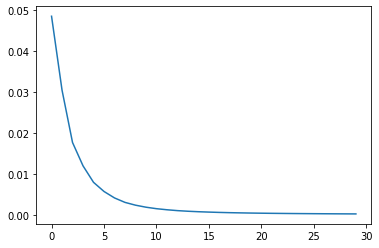

In [80]:
plt.plot(tr_loss_hist)